In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import time

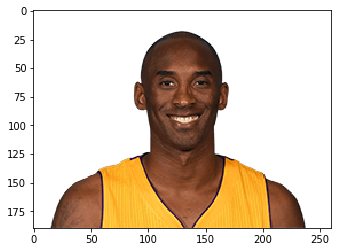

In [201]:
from PIL import Image

im = Image.open(r"images/kobe1.png")
x,y = im.size 
bg= Image.new('RGBA', im.size, (255,255,255))

bg.paste(im)
#rgb_bg=bg.convert('RGB')
#bg.save(r"images/kobe1.jpg")
#kobe_pic=Image.open('images/kobe1.jpg')


kobe_pic = np.array(bg)
# plot the image
plt.imshow(kobe_pic)
plt.show()

In [3]:
data=pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [3]:
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [359]:
years=[x.split('-')[0] for x in list(data['game_date'])]
years=np.array(pd.value_counts(years).index.tolist()).astype(int)
years.sort()
years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [4]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [5]:
data['shot_zone_basic'].value_counts()

Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: shot_zone_basic, dtype: int64

In [6]:
data['shot_zone_range'].value_counts()

Less Than 8 ft.    9398
16-24 ft.          8315
8-16 ft.           6626
24+ ft.            6275
Back Court Shot      83
Name: shot_zone_range, dtype: int64

In [7]:
data['shot_type'].value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [8]:
data['action_type'].value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [9]:
data['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

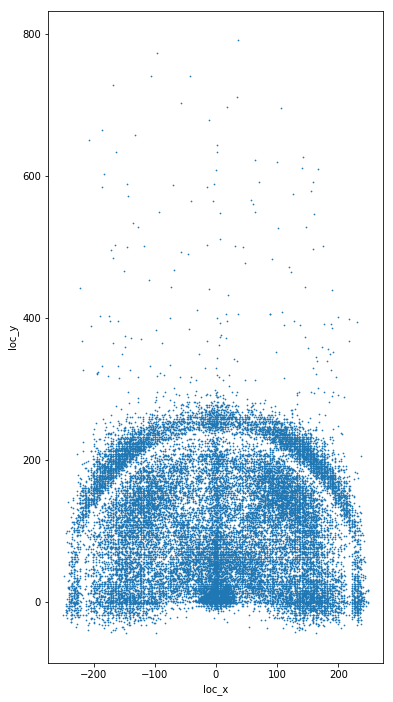

In [10]:
data.plot(kind='scatter',x='loc_x',y='loc_y',s=0.5,figsize=(6,12))

In [11]:
critical_score=np.zeros(len(data['loc_x']))
index_60=[x and y for x,y in zip(list(data['period']==4 ),list(data['minutes_remaining']==0 ))]
index_0=[x and y for x,y in zip(list(data['period']==4 ),list(data['seconds_remaining']==0 ))]
critical_score[index_60]=1
critical_score[index_0]=2

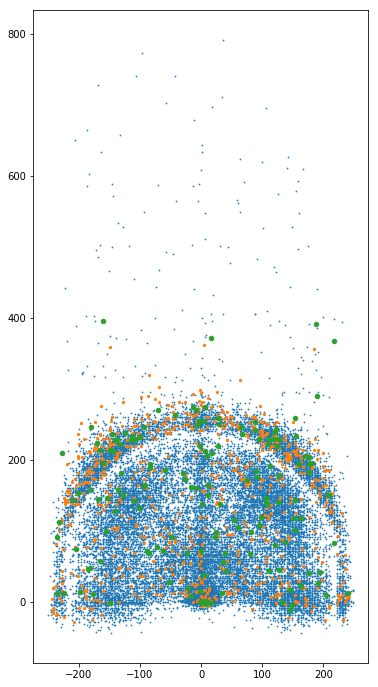

In [41]:
plt.figure(figsize=(6,12))
plt.scatter(data['loc_x'][critical_score==0],data['loc_y'][critical_score==0],s=0.5)
plt.scatter(data['loc_x'][critical_score==1],data['loc_y'][critical_score==1],s=5)
plt.scatter(data['loc_x'][critical_score==2],data['loc_y'][critical_score==2],s=20)

In [13]:
list(critical_score).count(1)/len(critical_score)

0.02814607290614718

In [14]:
list(critical_score).count(2)/len(critical_score)

0.00592891813532267

In [28]:
index_nonan=pd.notnull(data['shot_made_flag'])
data_nonan=data[index_nonan]

In [29]:
len(data_nonan)

25697

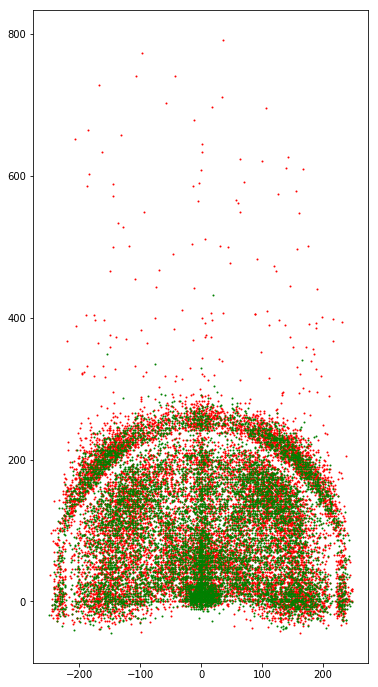

In [39]:
plt.figure(figsize=(6,12))
plt.scatter(data_nonan['loc_x'][data_nonan['shot_made_flag']==0],data_nonan['loc_y'][data_nonan['shot_made_flag']==0],c='r',s=1)
plt.scatter(data_nonan['loc_x'][data_nonan['shot_made_flag']==1],data_nonan['loc_y'][data_nonan['shot_made_flag']==1],c='g',s=1)

In [33]:
data_nonan['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

(-260, 260, -100, 850)

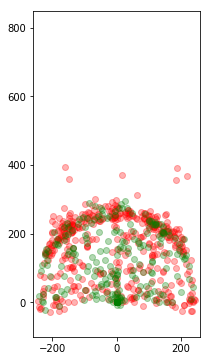

In [140]:
index_60=[x and y for x,y in zip(list(data_nonan['period']==4 ),list(data_nonan['minutes_remaining']==0 ))]
index_0=[x and y for x,y in zip(list(data_nonan['period']==4 ),list(data_nonan['seconds_remaining']==0 ))]

plt.figure(figsize=(3,6))
plt.scatter(data_nonan['loc_x'][index_60][data_nonan['shot_made_flag']==0],data_nonan['loc_y'][index_60][data_nonan['shot_made_flag']==0],c='r',alpha=0.3)
plt.scatter(data_nonan['loc_x'][index_60][data_nonan['shot_made_flag']==1],data_nonan['loc_y'][index_60][data_nonan['shot_made_flag']==1],c='g',alpha=0.3)
plt.axis((-260,260,-100,850))

In [78]:
data_nonan['shot_zone_basic'].value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [64]:
data_nonan.groupby(['shot_zone_area','shot_zone_basic'])['shot_made_flag'].sum()

shot_zone_area         shot_zone_basic      
Back Court(BC)         Above the Break 3           0.0
                       Backcourt                   1.0
Center(C)              Above the Break 3         297.0
                       In The Paint (Non-RA)    1433.0
                       Mid-Range                 537.0
                       Restricted Area          3666.0
Left Side Center(LC)   Above the Break 3         583.0
                       Mid-Range                 632.0
Left Side(L)           In The Paint (Non-RA)     130.0
                       Left Corner 3              89.0
                       Mid-Range                1024.0
Right Side Center(RC)  Above the Break 3         674.0
                       Mid-Range                 849.0
Right Side(R)          In The Paint (Non-RA)     200.0
                       Mid-Range                1237.0
                       Right Corner 3            113.0
Name: shot_made_flag, dtype: float64

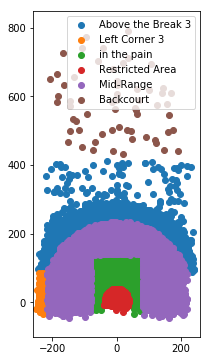

In [141]:
plt.figure(figsize=(3,6))
plt.scatter(data_nonan[data_nonan['shot_zone_basic']=='Above the Break 3']['loc_x'],data_nonan[data_nonan['shot_zone_basic']=='Above the Break 3']['loc_y'],label='Above the Break 3')
plt.scatter(data_nonan[data_nonan['shot_zone_basic']=='Left Corner 3']['loc_x'],data_nonan[data_nonan['shot_zone_basic']=='Left Corner 3']['loc_y'],label='Left Corner 3')
plt.scatter(data_nonan[data_nonan['shot_zone_basic']=='In The Paint (Non-RA)']['loc_x'],data_nonan[data_nonan['shot_zone_basic']=='In The Paint (Non-RA)']['loc_y'],label='in the pain')
plt.scatter(data_nonan[data_nonan['shot_zone_basic']=='Restricted Area']['loc_x'],data_nonan[data_nonan['shot_zone_basic']=='Restricted Area']['loc_y'],label='Restricted Area')
plt.scatter(data_nonan[data_nonan['shot_zone_basic']=='Mid-Range']['loc_x'],data_nonan[data_nonan['shot_zone_basic']=='Mid-Range']['loc_y'],label='Mid-Range')
plt.scatter(data_nonan[data_nonan['shot_zone_basic']=='Backcourt']['loc_x'],data_nonan[data_nonan['shot_zone_basic']=='Backcourt']['loc_y'],label='Backcourt')
plt.axis((-260,260,-100,850))
plt.legend()

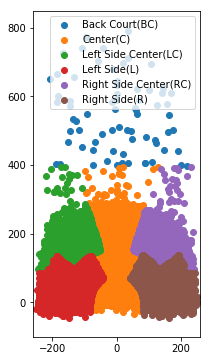

In [142]:
plt.figure(figsize=(3,6))
plt.scatter(data_nonan[data_nonan['shot_zone_area']=='Back Court(BC)']['loc_x'],data_nonan[data_nonan['shot_zone_area']=='Back Court(BC)']['loc_y'],label='Back Court(BC)')
plt.scatter(data_nonan[data_nonan['shot_zone_area']=='Center(C)']['loc_x'],data_nonan[data_nonan['shot_zone_area']=='Center(C)']['loc_y'],label='Center(C)')
plt.scatter(data_nonan[data_nonan['shot_zone_area']=='Left Side Center(LC)']['loc_x'],data_nonan[data_nonan['shot_zone_area']=='Left Side Center(LC)']['loc_y'],label='Left Side Center(LC)')
plt.scatter(data_nonan[data_nonan['shot_zone_area']=='Left Side(L)']['loc_x'],data_nonan[data_nonan['shot_zone_area']=='Left Side(L)']['loc_y'],label='Left Side(L)')
plt.scatter(data_nonan[data_nonan['shot_zone_area']=='Right Side Center(RC)']['loc_x'],data_nonan[data_nonan['shot_zone_area']=='Right Side Center(RC)']['loc_y'],label='Right Side Center(RC)')
plt.scatter(data_nonan[data_nonan['shot_zone_area']=='Right Side(R)']['loc_x'],data_nonan[data_nonan['shot_zone_area']=='Right Side(R)']['loc_y'],label='Right Side(R)')
plt.axis((-260,260,-100,850))
plt.legend()

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

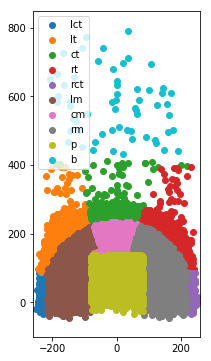

In [143]:
index_lct= data_nonan['shot_zone_basic']=='Left Corner 3'
index_lt=[x and (y or z) for x,y,z in zip(list(data_nonan['shot_zone_basic']=='Above the Break 3'),list(data_nonan['shot_zone_area']=='Left Side Center(LC)'),list(data_nonan['shot_zone_area']=='Left Side(L)'))]
index_rt=[x and (y or z) for x,y,z in zip(list(data_nonan['shot_zone_basic']=='Above the Break 3'),list(data_nonan['shot_zone_area']=='Right Side Center(RC)'),list(data_nonan['shot_zone_area']=='Right Side(R)'))]
index_ct=[x ^ (y or z) for x,y,z in zip(list(data_nonan['shot_zone_basic']=='Above the Break 3'),index_lt,index_rt)]
index_rct=data_nonan['shot_zone_basic']=='Right Corner 3'
index_lm=[x and (y or z) for x,y,z in zip(list(data_nonan['shot_zone_basic']=='Mid-Range'),list(data_nonan['shot_zone_area']=='Left Side Center(LC)'),list(data_nonan['shot_zone_area']=='Left Side(L)'))]
index_rm=[x and (y or z) for x,y,z in zip(list(data_nonan['shot_zone_basic']=='Mid-Range'),list(data_nonan['shot_zone_area']=='Right Side Center(RC)'),list(data_nonan['shot_zone_area']=='Right Side(R)'))]
index_cm=[x ^ (y or z) for x,y,z in zip(list(data_nonan['shot_zone_basic']=='Mid-Range'),index_lm,index_rm)]
index_p=[x or y for x,y in zip(list(data_nonan['shot_zone_basic']=='In The Paint (Non-RA)'),list(data_nonan['shot_zone_basic']=='Restricted Area'))]
index_b=data_nonan['shot_zone_basic']=='Backcourt'

data_nonan['shot_area']=np.zeros(len(data_nonan['shot_zone_area']))
data_nonan['shot_area'][index_lct]='lct'
data_nonan['shot_area'][index_lt]='lt'
data_nonan['shot_area'][index_rt]='rt'
data_nonan['shot_area'][index_ct]='ct'
data_nonan['shot_area'][index_rct]='rct'
data_nonan['shot_area'][index_lm]='lm'
data_nonan['shot_area'][index_rm]='rm'
data_nonan['shot_area'][index_cm]='cm'
data_nonan['shot_area'][index_p]='p'
data_nonan['shot_area'][index_b]='b'

plt.figure(figsize=(3,6))
plt.scatter(data_nonan[index_lct]['loc_x'],data_nonan[index_lct]['loc_y'],label='lct')
plt.scatter(data_nonan[index_lt]['loc_x'],data_nonan[index_lt]['loc_y'],label='lt')
plt.scatter(data_nonan[index_ct]['loc_x'],data_nonan[index_ct]['loc_y'],label='ct')
plt.scatter(data_nonan[index_rt]['loc_x'],data_nonan[index_rt]['loc_y'],label='rt')
plt.scatter(data_nonan[index_rct]['loc_x'],data_nonan[index_rct]['loc_y'],label='rct')
plt.scatter(data_nonan[index_lm]['loc_x'],data_nonan[index_lm]['loc_y'],label='lm')
plt.scatter(data_nonan[index_cm]['loc_x'],data_nonan[index_cm]['loc_y'],label='cm')
plt.scatter(data_nonan[index_rm]['loc_x'],data_nonan[index_rm]['loc_y'],label='rm')
plt.scatter(data_nonan[index_p]['loc_x'],data_nonan[index_p]['loc_y'],label='p')
plt.scatter(data_nonan[index_b]['loc_x'],data_nonan[index_b]['loc_y'],label='b')
plt.axis((-260,260,-100,850))
plt.legend()

In [119]:
shot_rate=data_nonan[['shot_area','shot_made_flag']].groupby(['shot_area'], as_index=False).mean()
shot_thermogram=pd.DataFrame(shot_rate)
shot_count=data_nonan.groupby(['shot_area'])['shot_made_flag'].count().to_list()
shot_get=data_nonan.groupby(['shot_area'])['shot_made_flag'].sum().to_list()
shot_thermogram['shot_get']=shot_get
shot_thermogram['shot_count']=shot_count

In [120]:
shot_thermogram

,shot_area,shot_made_flag,shot_get,shot_count
0,b,0.016667,1.0,60
1,cm,0.418877,537.0,1282
2,ct,0.316631,297.0,938
3,lct,0.370833,89.0,240
4,lm,0.402430,1656.0,4115
5,lt,0.319277,583.0,1826
6,p,0.553302,5429.0,9812
7,rct,0.339339,113.0,333
8,rm,0.406232,2086.0,5135
9,rt,0.344581,674.0,1956


In [132]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

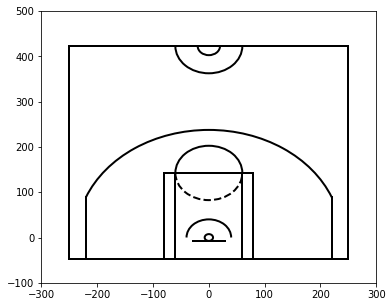

In [144]:
plt.figure(figsize=(6,5))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

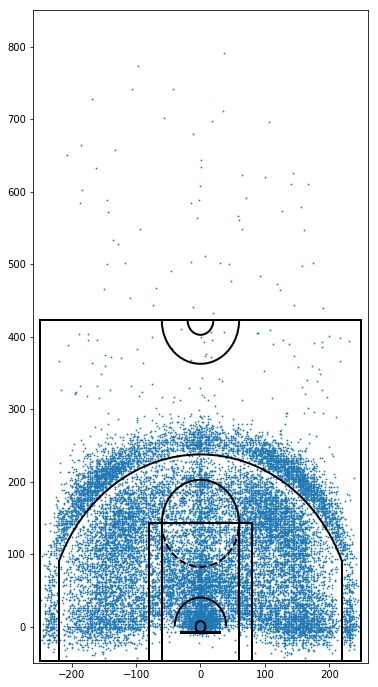

In [139]:
plt.figure(figsize=(6,12))
draw_court(outer_lines=True)
plt.scatter(data_nonan['loc_x'],data_nonan['loc_y'],s=0.6)
plt.xlim(-260,260)
plt.ylim(-50,850)
plt.show()

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


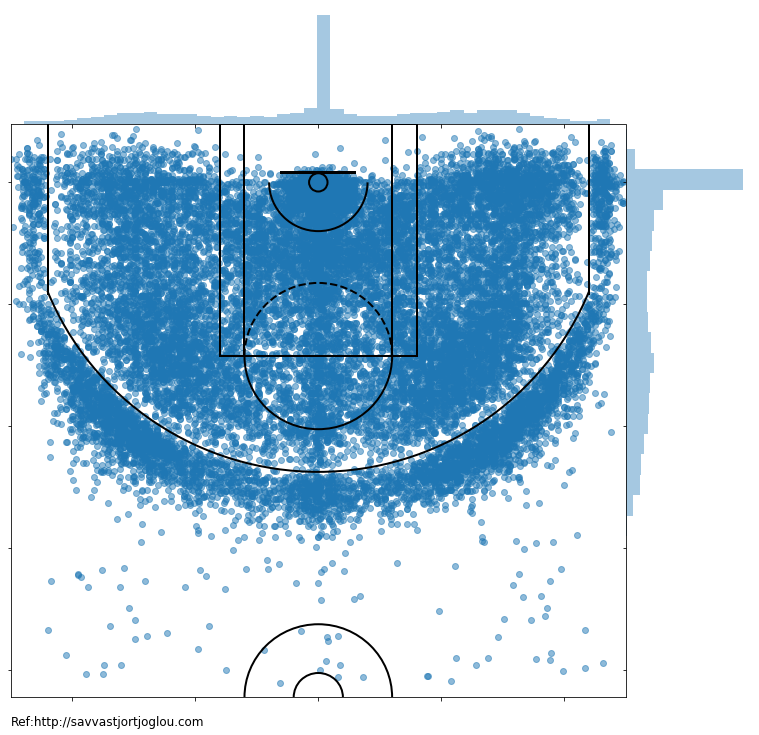

In [147]:
# create our jointplot
joint_shot_chart = sns.jointplot(data_nonan.loc_x, data_nonan.loc_y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kobe Bryant Shot', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Ref:http://savvastjortjoglou.com',fontsize=12)

plt.show()

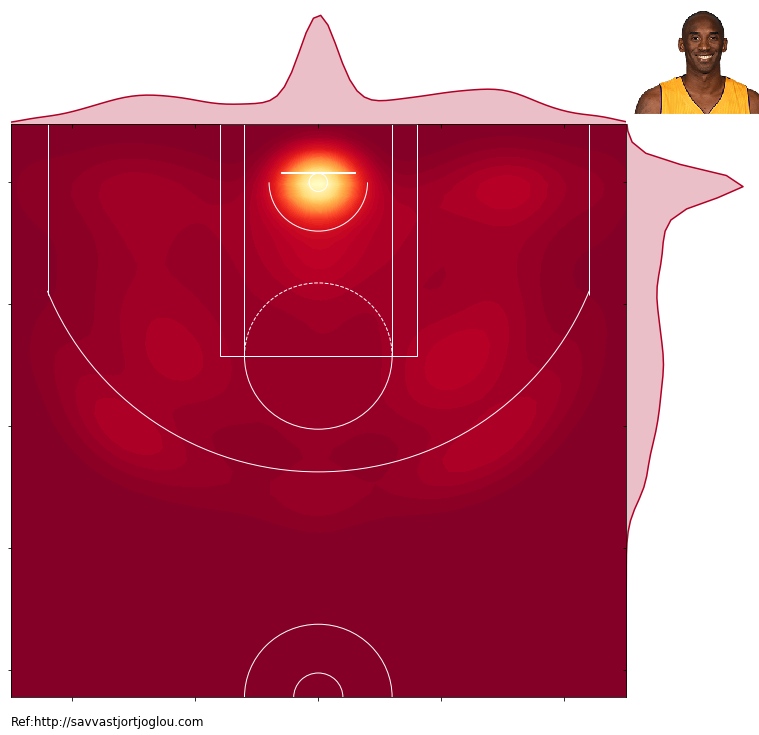

In [199]:
from matplotlib.offsetbox import  OffsetImage
'''
# import the object that contains the viridis colormap
from option_d import test_cm as viridis

# Register and set Viridis as the colormap for the plot
plt.register_cmap(cmap=viridis)
cmap = plt.get_cmap(viridis.name)
'''
cmap=plt.cm.YlOrRd_r
# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(data_nonan.loc_x, data_nonan.loc_y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint, 
# It's the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, color="white", lw=1)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kobe Bryant Shot', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Ref:http://savvastjortjoglou.com', fontsize=12)

# Add Kobe's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
img = OffsetImage(kobe_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
img.set_offset((625,621))
# add the image
ax.add_artist(img)

plt.show()

# 划分训练集

### 按shot_zone_range进行分层采样

In [49]:
index_dropnan=pd.notnull(data['shot_made_flag'])
data_dropnan=data[index_dropnan]

In [47]:
index_nan=[x!=1 and x!=0 for x in data['shot_made_flag']]
data[index_nan]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
16,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
19,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
32,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33
33,Jump Shot,Jump Shot,8,20000047,33.8503,70,194,-118.1998,10,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,34
34,Layup Shot,Layup,26,20000047,34.0253,1,19,-118.2688,7,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,35
35,Layup Shot,Layup,37,20000047,34.0293,-12,15,-118.2818,5,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,36
36,Reverse Layup Shot,Layup,53,20000047,34.0403,1,4,-118.2688,4,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,37
37,Jump Shot,Jump Shot,165,20000047,33.9283,-117,116,-118.3868,5,2,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,38


In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(data_dropnan,data_dropnan['shot_zone_range']):
    strat_train_set=data_dropnan.iloc[train_index]
    strat_test_set=data_dropnan.iloc[test_index]

In [54]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_dropnan, test_size=0.2, random_state=42)

In [55]:
Overall=np.array(data_dropnan['shot_zone_range'].value_counts()/len(data_dropnan))
Random=np.array(train_set['shot_zone_range'].value_counts()/len(train_set))
Stratified=np.array(strat_train_set['shot_zone_range'].value_counts()/len(strat_train_set))
Rand_error=Random-Overall
Strat_error=Stratified-Overall

pd.DataFrame(np.c_[Overall,Random,Stratified,Rand_error,Strat_error],
             columns=['Overall','Random','Stratified','Rand_error','Strat_error'])

,Overall,Random,Stratified,Rand_error,Strat_error
0,0.305756,0.307632,0.305735,0.001877,-0.000020
1,0.268786,0.267841,0.268765,-0.000946,-0.000021
2,0.217146,0.216277,0.217152,-0.000869,0.000006
3,0.205510,0.205283,0.205526,-0.000227,0.000016
4,0.002802,0.002967,0.002821,0.000165,0.000020


In [86]:
train_data=strat_train_set.copy()
test_data=strat_test_set.copy()

# 投篮预测

In [203]:
data_nonan['shot_zone_range'].value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [209]:
data_train=data_nonan

In [361]:
data_train

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,shot_area,time_going,years
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,lm,1,2000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,lm,4,2000
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,rm,5,2000
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,p,17,2000
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,lm,26,2000
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7,p,27,2000
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9,p,29,2000
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10,p,32,2000
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11,lt,34,2000
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12,rm,1,2000


# 数据探索

## action_type对命中率影响

In [217]:
data_train[['action_type','shot_made_flag']].groupby(['action_type']).mean()

,shot_made_flag
action_type,
Alley Oop Dunk Shot,0.947368
Alley Oop Layup shot,0.716418
Cutting Layup Shot,0.666667
Driving Bank shot,0.666667
Driving Dunk Shot,0.976654
Driving Finger Roll Layup Shot,0.881356
Driving Finger Roll Shot,0.852941
Driving Floating Bank Jump Shot,1.000000
Driving Floating Jump Shot,0.333333


In [219]:
data_train.groupby(['action_type','shot_made_flag'])['action_type'].count()

action_type                      shot_made_flag
Alley Oop Dunk Shot              0.0                  5
                                 1.0                 90
Alley Oop Layup shot             0.0                 19
                                 1.0                 48
Cutting Layup Shot               0.0                  2
                                 1.0                  4
Driving Bank shot                0.0                  1
                                 1.0                  2
Driving Dunk Shot                0.0                  6
                                 1.0                251
Driving Finger Roll Layup Shot   0.0                  7
                                 1.0                 52
Driving Finger Roll Shot         0.0                 10
                                 1.0                 58
Driving Floating Bank Jump Shot  1.0                  1
Driving Floating Jump Shot       0.0                  2
                                 1.0                  1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

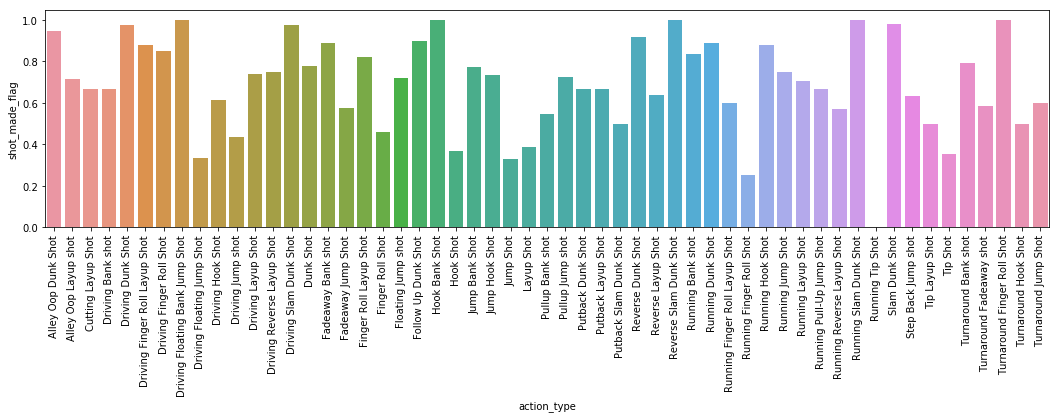

In [229]:
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
shot_rate = data_train[['action_type','shot_made_flag']].groupby(['action_type'],as_index=False).mean()
sns.barplot(x='action_type',y='shot_made_flag',data=shot_rate)
plt.xticks(rotation=90)

## combined_shot_type与命中率关系

In [220]:
data_train[['combined_shot_type','shot_made_flag']].groupby(['combined_shot_type']).mean()

,shot_made_flag
combined_shot_type,
Bank Shot,0.791667
Dunk,0.928030
Hook Shot,0.535433
Jump Shot,0.391071
Layup,0.565093
Tip Shot,0.348684


In [221]:
data_train.groupby(['combined_shot_type','shot_made_flag'])['combined_shot_type'].count()

combined_shot_type  shot_made_flag
Bank Shot           0.0                  25
                    1.0                  95
Dunk                0.0                  76
                    1.0                 980
Hook Shot           0.0                  59
                    1.0                  68
Jump Shot           0.0               12002
                    1.0                7708
Layup               0.0                1971
                    1.0                2561
Tip Shot            0.0                  99
                    1.0                  53
Name: combined_shot_type, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

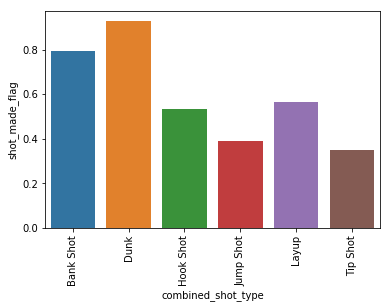

In [233]:
fig,axis1 = plt.subplots(1,1,figsize=(6,4))
shot_rate = data_train[['combined_shot_type','shot_made_flag']].groupby(['combined_shot_type'],as_index=False).mean()
sns.barplot(x='combined_shot_type',y='shot_made_flag',data=shot_rate)
plt.xticks(rotation=90)

## shot_area与命中率关系

In [222]:
data_train[['shot_area','shot_made_flag']].groupby(['shot_area']).mean()

,shot_made_flag
shot_area,
b,0.016667
cm,0.418877
ct,0.316631
lct,0.370833
lm,0.402430
lt,0.319277
p,0.553302
rct,0.339339
rm,0.406232


In [223]:
data_train.groupby(['shot_area','shot_made_flag'])['shot_area'].count()

shot_area  shot_made_flag
b          0.0                 59
           1.0                  1
cm         0.0                745
           1.0                537
ct         0.0                641
           1.0                297
lct        0.0                151
           1.0                 89
lm         0.0               2459
           1.0               1656
lt         0.0               1243
           1.0                583
p          0.0               4383
           1.0               5429
rct        0.0                220
           1.0                113
rm         0.0               3049
           1.0               2086
rt         0.0               1282
           1.0                674
Name: shot_area, dtype: int64

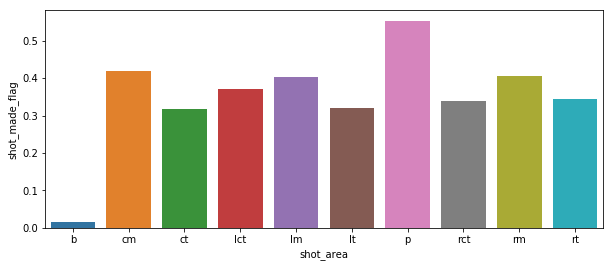

In [235]:
fig,axis1 = plt.subplots(1,1,figsize=(10,4))
shot_rate = data_train[['shot_area','shot_made_flag']].groupby(['shot_area'],as_index=False).mean()
sns.barplot(x='shot_area',y='shot_made_flag',data=shot_rate)

## shot_zone_range与命中率关系

In [224]:
data_train[['shot_zone_range','shot_made_flag']].groupby(['shot_zone_range']).mean()

,shot_made_flag
shot_zone_range,
16-24 ft.,0.401766
24+ ft.,0.332513
8-16 ft.,0.435484
Back Court Shot,0.013889
Less Than 8 ft.,0.573120


In [225]:
data_train.groupby(['shot_zone_range','shot_made_flag'])['shot_zone_range'].count()

shot_zone_range  shot_made_flag
16-24 ft.        0.0               4132
                 1.0               2775
24+ ft.          0.0               3525
                 1.0               1756
8-16 ft.         0.0               3150
                 1.0               2430
Back Court Shot  0.0                 71
                 1.0                  1
Less Than 8 ft.  0.0               3354
                 1.0               4503
Name: shot_zone_range, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

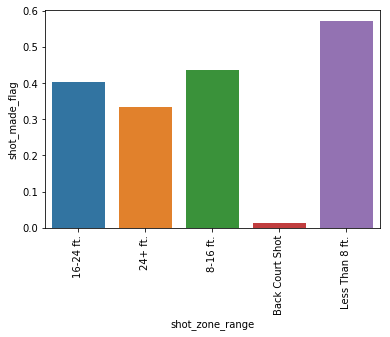

In [237]:
fig,axis1 = plt.subplots(1,1,figsize=(6,4))
shot_rate = data_train[['shot_zone_range','shot_made_flag']].groupby(['shot_zone_range'],as_index=False).mean()
sns.barplot(x='shot_zone_range',y='shot_made_flag',data=shot_rate)
plt.xticks(rotation=90)

## shot_distance对命中率影响

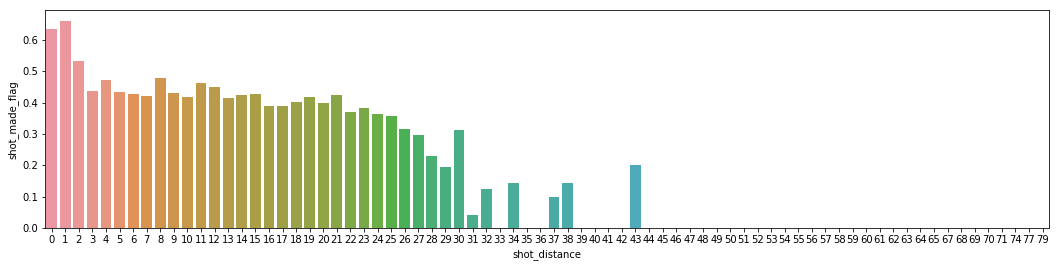

In [338]:
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
shot_rate = data_train[['shot_distance','shot_made_flag']].groupby(['shot_distance'],as_index=False).mean()
sns.barplot(x='shot_distance',y='shot_made_flag',data=shot_rate)

## opponent对命中率影响

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

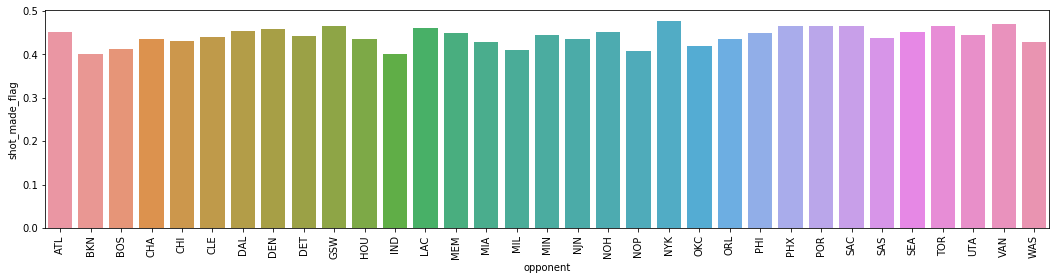

In [339]:
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
shot_rate = data_train[['opponent','shot_made_flag']].groupby(['opponent'],as_index=False).mean()
sns.barplot(x='opponent',y='shot_made_flag',data=shot_rate)
plt.xticks(rotation=90)

In [341]:
len(data_train['opponent'].value_counts())

33

## 时间对命中率影响

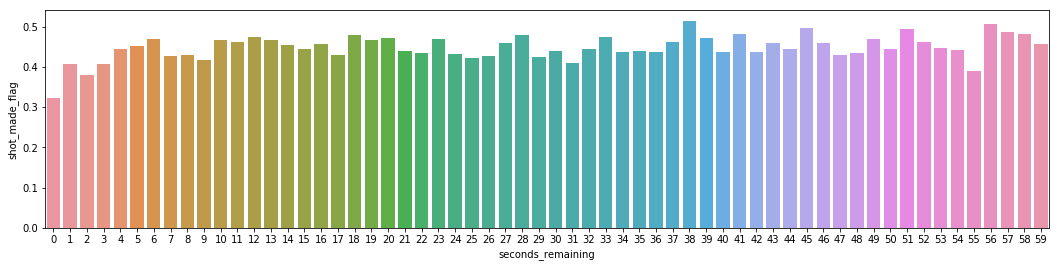

In [263]:
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
shot_rate = data_train[['seconds_remaining','shot_made_flag']].groupby(['seconds_remaining'],as_index=False).mean()
sns.barplot(x='seconds_remaining',y='shot_made_flag',data=shot_rate)

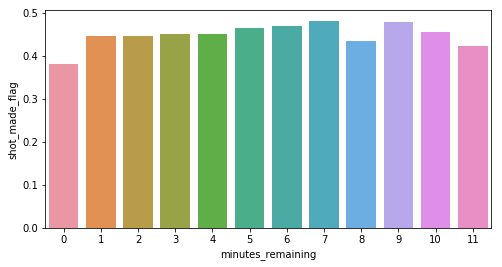

In [266]:
fig,axis1 = plt.subplots(1,1,figsize=(8,4))
shot_rate = data_train[['minutes_remaining','shot_made_flag']].groupby(['minutes_remaining'],as_index=False).mean()
sns.barplot(x='minutes_remaining',y='shot_made_flag',data=shot_rate)

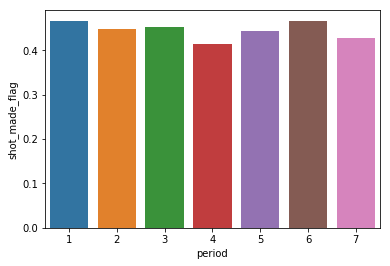

In [268]:
fig,axis1 = plt.subplots(1,1,figsize=(6,4))
shot_rate = data_train[['period','shot_made_flag']].groupby(['period'],as_index=False).mean()
sns.barplot(x='period',y='shot_made_flag',data=shot_rate)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


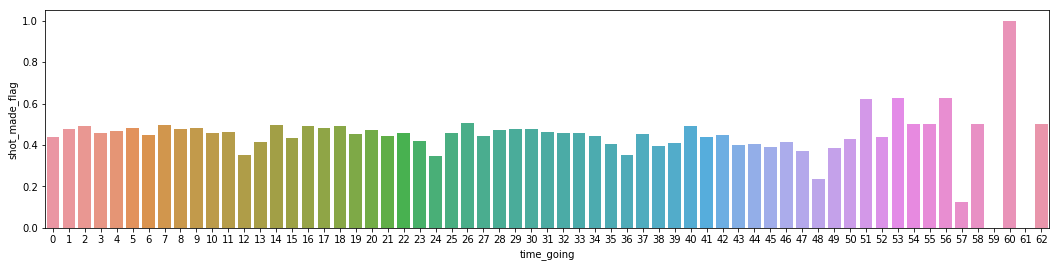

In [337]:
cat_attribs = list(data_train)
cat_pipline=Pipeline([('selector',DataFrameSelector(cat_attribs)),
                    ('adder',CombinedAttributesAdder())])
data_add=cat_pipline.fit_transform(data_train)
data_train['time_going']=(data_add[:,-1]/60).astype(int)

fig,axis1 = plt.subplots(1,1,figsize=(18,4))
shot_rate = data_train[['time_going','shot_made_flag']].groupby(['time_going'],as_index=False).mean()
sns.barplot(x='time_going',y='shot_made_flag',data=shot_rate)

## years对命中率影响

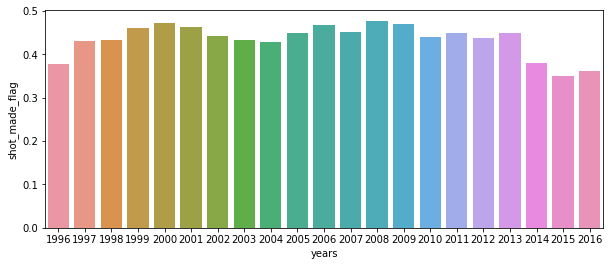

In [363]:
fig,axis1 = plt.subplots(1,1,figsize=(10,4))
shot_rate = data_train[['years','shot_made_flag']].groupby(['years'],as_index=False).mean()
sns.barplot(x='years',y='shot_made_flag',data=shot_rate)

## 数据清洗

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
minutes_remaining_id,period_id,seconds_remaining_id,shot_zone_area_id,shot_zone_basic_id,game_date_id =0,1,2,3,4,5

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __int__(self):
        pass
    def fit(self,X):
        return self
    def transform(self,X):
        #添加time_num属性
        period_normal=4-X[:,period_id]
        index_jiashi=period_normal<0
        index_normal=(1-index_jiashi).astype(np.bool)
        
        period_jiashi=np.zeros(len(period_normal))
        period_jiashi[index_jiashi]=abs(period_normal[index_jiashi])
        period_normal[index_jiashi]=0

        time_going=np.zeros(X.shape[0])
        time_going[index_normal]=4*12*60 - (period_normal[index_normal]*12*60 + X[index_normal,minutes_remaining_id]*60 + X[index_normal,seconds_remaining_id])
        time_going[index_jiashi]=4*12*60 + (period_jiashi[index_jiashi]*5*60 - X[index_jiashi,minutes_remaining_id]*60 - X[index_jiashi,seconds_remaining_id])
        
        time_num=(time_going/60).astype(int)
        time_num[time_num>48]=48
        time_num=np.ceil(time_num/3)
        
        #添加shot_area属性
        index_lct= X[:,shot_zone_basic_id]=='Left Corner 3'
        index_lt=[x and (y or z) for x,y,z in zip(list(X[:,shot_zone_basic_id]=='Above the Break 3'),list(X[:,shot_zone_area_id]=='Left Side Center(LC)'),list(X[:,shot_zone_area_id]=='Left Side(L)'))]
        index_rt=[x and (y or z) for x,y,z in zip(list(X[:,shot_zone_basic_id]=='Above the Break 3'),list(X[:,shot_zone_area_id]=='Right Side Center(RC)'),list(X[:,shot_zone_area_id]=='Right Side(R)'))]
        index_ct=[x ^ (y or z) for x,y,z in zip(list(X[:,shot_zone_basic_id]=='Above the Break 3'),index_lt,index_rt)]
        index_rct=X[:,shot_zone_basic_id]=='Right Corner 3'
        index_lm=[x and (y or z) for x,y,z in zip(list(X[:,shot_zone_basic_id]=='Mid-Range'),list(X[:,shot_zone_area_id]=='Left Side Center(LC)'),list(X[:,shot_zone_area_id]=='Left Side(L)'))]
        index_rm=[x and (y or z) for x,y,z in zip(list(X[:,shot_zone_basic_id]=='Mid-Range'),list(X[:,shot_zone_area_id]=='Right Side Center(RC)'),list(X[:,shot_zone_area_id]=='Right Side(R)'))]
        index_cm=[x ^ (y or z) for x,y,z in zip(list(X[:,shot_zone_basic_id]=='Mid-Range'),index_lm,index_rm)]
        index_p=[x or y for x,y in zip(list(X[:,shot_zone_basic_id]=='In The Paint (Non-RA)'),list(X[:,shot_zone_basic_id]=='Restricted Area'))]
        index_b=X[:,shot_zone_basic_id]=='Backcourt'
        
        shot_area=np.zeros(X.shape[0])
        shot_area[index_lct]=1 #'lct'
        shot_area[index_lt]=2 #'lt'
        shot_area[index_rt]=3 #'rt'
        shot_area[index_ct]=4 #'ct'
        shot_area[index_rct]=5 #'rct'
        shot_area[index_lm]=6 #'lm'
        shot_area[index_rm]=7 #'rm'
        shot_area[index_cm]=8 #'cm'
        shot_area[index_p]=9 #'p'
        shot_area[index_b]=10 #'b'
        
        #添加years属性
        years=[x.split('-')[0] for x in list(X[:,game_date_id])]
        years=np.array(years).astype(int)
        
        #转化为独热变量
        add_encoder=OneHotEncoder()
        area_years_time_1hot=add_encoder.fit_transform(np.c_[shot_area,years,time_num])

        return area_years_time_1hot

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

add_attribs = ["minutes_remaining","period","seconds_remaining","shot_zone_area","shot_zone_basic","game_date"]
#cat_attribs = ["action_type","combined_shot_type","shot_zone_range"]
cat_attribs = ["combined_shot_type","shot_zone_range"]

add_pipeline=Pipeline([('selector',DataFrameSelector(add_attribs)),
                      ('attribs_adder',CombinedAttributesAdder())])
cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attribs)),
                    ('encoder',OneHotEncoder())])

full_pipeline = FeatureUnion(transformer_list=[("add_pipeline", add_pipeline),
                                               ("cat_pipeline", cat_pipeline)])
data_prepared = full_pipeline.fit_transform(train_data)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [102]:
data_prepared.shape

(20557, 59)

In [104]:
train_data.shape

(20557, 25)

In [105]:
test_data.shape

(5140, 25)

In [109]:
X_test.shape

(5140, 59)

In [108]:
X_train.shape

(20557, 59)

# 选择并训练模型

In [103]:
X_train=data_prepared
y_train=strat_train_set['shot_made_flag'].copy()

X_test=full_pipeline.fit_transform(test_data)
y_test=strat_test_set['shot_made_flag'].copy()

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [110]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

C = 5
alpha = 1 / (C * X.shape[0])

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)
t1=time.time()
lin_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
t2=time.time()

print("LinearSVC:                   ", lin_clf.score(X_test,y_test))
print("SVC:                         ", svm_clf.score(X_test,y_test))
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.score(X_test,y_test))
print("耗时：",(t2-t1))

LinearSVC:                    0.6140077821011674
SVC:                          0.6140077821011674
SGDClassifier(alpha=0.00001): 0.6140077821011674
耗时： 131.19646978378296


In [111]:
lin_clf.score(X_train,y_train)

0.6153135185095101

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=60,
                             algorithm="SAMME.R", learning_rate=0.1)
t1=time.time()
ada_clf.fit(X_train,y_train)
t2=time.time()

print("AdaBoostClassifier训练集精度:", ada_clf.score(X_train,y_train))
print("AdaBoostClassifier测试集精度:", ada_clf.score(X_test,y_test))
print("耗时：",(t2-t1))

AdaBoostClassifier训练集精度: 0.6153135185095101
AdaBoostClassifier测试集精度: 0.6140077821011674
耗时： 0.3930184841156006


In [123]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(learning_rate=0.01, n_estimators=500, 
                            max_depth=7, subsample=0.6, colsample_bytree=0.6)
t1=time.time()
xgb_clf.fit(X_train,y_train)
t2=time.time()

print("XGBClassifier训练集精度:", xgb_clf.score(X_train,y_train))
print("XGBClassifier测试集精度:", xgb_clf.score(X_test,y_test))
print("耗时：",(t2-t1))

XGBClassifier训练集精度: 0.6239723695091697
XGBClassifier测试集精度: 0.6136186770428016
耗时： 5.781563997268677


In [115]:
submission=pd.read_csv("submission.csv")

In [117]:
submission['true_shot']=data['shot_made_flag'][list(submission['shot_id'])]

In [122]:
data[index_nan]['shot_id'].tolist()

[1,
 8,
 17,
 20,
 33,
 34,
 35,
 36,
 37,
 38,
 45,
 50,
 55,
 60,
 66,
 67,
 71,
 80,
 85,
 86,
 95,
 104,
 113,
 123,
 126,
 133,
 141,
 144,
 150,
 152,
 153,
 156,
 159,
 165,
 172,
 182,
 192,
 193,
 196,
 202,
 210,
 211,
 228,
 257,
 260,
 264,
 267,
 279,
 282,
 293,
 299,
 300,
 301,
 317,
 327,
 328,
 335,
 346,
 348,
 365,
 390,
 391,
 392,
 397,
 418,
 428,
 434,
 439,
 440,
 456,
 459,
 472,
 480,
 491,
 497,
 509,
 511,
 523,
 533,
 544,
 546,
 555,
 558,
 560,
 573,
 591,
 596,
 597,
 601,
 605,
 617,
 628,
 634,
 646,
 649,
 651,
 654,
 656,
 657,
 669,
 670,
 693,
 694,
 699,
 711,
 718,
 722,
 723,
 725,
 734,
 735,
 737,
 746,
 747,
 766,
 767,
 771,
 773,
 774,
 783,
 784,
 789,
 792,
 804,
 809,
 812,
 813,
 817,
 820,
 825,
 826,
 829,
 855,
 859,
 862,
 870,
 876,
 880,
 886,
 889,
 891,
 897,
 902,
 903,
 908,
 909,
 920,
 922,
 924,
 932,
 934,
 937,
 941,
 943,
 950,
 952,
 954,
 963,
 975,
 979,
 981,
 983,
 985,
 989,
 995,
 998,
 1008,
 1019,
 1023,
 1026,

In [118]:
submission

,shot_id,shot_made_flag,true_shot
0,1,0.386420,NaN
1,8,0.352220,0.0
2,17,0.601884,NaN
3,20,0.751511,NaN
4,33,0.317968,NaN
5,34,0.402614,NaN
6,35,0.512198,NaN
7,36,0.508057,NaN
8,37,0.627493,1.0
9,38,0.377483,NaN


In [24]:
ord('a')

97

In [22]:
s='wrt'
sorted(s)

['r', 't', 'w']